In [1]:
#I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work
!pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
from torch import nn
import torch
from collections import deque
import random

In [3]:
###
class Network(nn.Module):
  def __init__(self,env):
    super(Network, self).__init__()
    my_features = 16
    self.net = nn.Sequential(nn.Linear(my_features, 64), nn.ReLU(),nn.Linear(64, 64), nn.ReLU(),nn.Linear(64,4))
  
  def forward(self,x):
    return self.net(x)
  
  def act(self,obs):
    pass   
###

In [4]:
class DeterGridEnvironment(gym.Env):            #Deterministic enviroment
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)  #12
        self.action_space = spaces.Discrete(4)   #4
        # self.max_timesteps = 25   #10
        self.max_timesteps = 25 #25  # 7

    def reset(self):
        self.timestep = 0
        self.reward=0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.r1=[0,2]
        self.r2=[1,1]
        self.r3=[1,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.0
        self.state[tuple(self.r1)] = 0.0
        self.state[tuple(self.r2)] = 0.0
        self.state[tuple(self.r3)] = 0.0
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:  #Down
          self.agent_pos[0] += 1
        if action == 1:  #Up
          self.agent_pos[0] -= 1
        if action == 2:  #Right
          self.agent_pos[1] += 1
        if action == 3:  #Left
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.0
        self.state[tuple(self.r1)] = 0.0
        self.state[tuple(self.r2)] = 0.0
        self.state[tuple(self.r3)] = 0.0
        observation = self.state.flatten()
        
        
        if (self.agent_pos == self.goal_pos).all():
          self.reward += 1
          #print('Goal Reached: +100')
        elif (self.agent_pos == self.r1).all():
          self.reward +=0.4
        elif (self.agent_pos == self.r2).all():
          self.reward +=-0.8
        elif (self.agent_pos == self.r3).all():
          self.reward +=0.4
        
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
          done = True
        elif (self.agent_pos == self.goal_pos).all():
          done = True
        else:
          done = False 
        info = {}
        #print(observation)
        return observation, self.reward, done, info

    ###
    def get_agent_pos(self):
      
      pos = np.zeros((4,4)) 
      for row in range(4):
        for col in range(4):
          if (row == self.agent_pos[0] and col == self.agent_pos[1]):
            pos[row,col] = 1
      
      pos = pos.flatten()
      return pos
    ###
    def render(self):
        plt.imshow(self.state)

In [5]:
###
online_net = Network(DeterGridEnvironment)
target_net = Network(DeterGridEnvironment)

# declare replay buffer
replay_buffer = deque(maxlen=50000)

# assign the same parameters of online net to target net
target_net.load_state_dict(online_net.state_dict())

# define optimizer
optimizer = torch.optim.Adam(online_net.parameters(), lr=0.005)
###

In [6]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

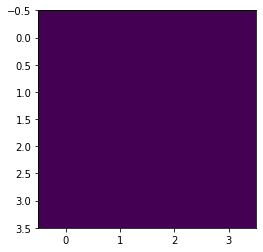

<IPython.core.display.Javascript object>

Total reward: -2.4000000000000004


In [7]:
env = DeterGridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

###
# while not done:
for i in range(100):

###
  action = agent.step(obs)
  ###
  old_state = env.get_agent_pos()
  ###
  obs, reward, done, info = env.step(action)
  ###
  new_state = env.get_agent_pos()
  # initialize buffer
  done_i = int(done == True) 
  trans = (old_state,action,reward,done_i,new_state)
  replay_buffer.append(trans)
  ###
  
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  ###
  if done:
    env.reset()
  ###
print('Total reward:', env.reward)

In [8]:
class ddqn_learning:

  def __init__(self):
    self.env = DeterGridEnvironment()
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values_tar=np.zeros((16,4))
    self.q_values =np.zeros((16,4))
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilondecay=[]
    self.epsilon=1
    self.lr=0.2
    self.df=0.9
    self.decay=0.99885              # 2000 - 0.9978 #6000 - 0.9993
    self.r1_got = False
    self.r3_got = False
    self.tow = 0.9
    self.gamma = 0.99

  def reset(self):
    self.env.agent_pos=[0,0]
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.state=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0
    self.r1_got = False
    self.r3_got = False

  # for training
  def action1(self,state1,epsilon,old_state):
    
    if np.random.rand()>epsilon:
      old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
      return np.argmax(online_net.forward(old_state_t).tolist())
    else:
      return np.random.randint(4)
  
  # for evalution
  def action2(self,state1,epsilon,old_state):

    old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
    return np.argmax(online_net.forward(old_state_t).tolist())
  
  def takeaction(self,action):
    if action == 0:  #Down
        self.env.agent_pos[0] += 1
    elif action == 1:  #Up
        self.env.agent_pos[0] -= 1
    elif action == 2:  #Right
        self.env.agent_pos[1] += 1
    elif action == 3:  #Left
        self.env.agent_pos[1] -= 1
    self.env.agent_pos = np.clip(self.env.agent_pos, 0, 3)
    
    if (self.env.agent_pos == self.env.goal_pos).all():
        self.reward = 1
    elif (self.env.agent_pos == self.env.r1).all():
        if self.r1_got == False:
          self.reward =0.4
          self.r1_got = True
        else:
          self.reward = -0.5 #0  
    elif (self.env.agent_pos == self.env.r2).all():
        self.reward =-0.8 
    elif (self.env.agent_pos == self.env.r3).all():
        if self.r3_got == False:
          self.reward =0.4
          self.r3_got = True
        else:
          self.reward = -0.5 #0
    else:
        self.reward = -0.5 #0

    self.env.timestep+=1
    self.stepno+=1

    return(self.env.agent_pos,self.reward)
  
  def training(self):

    count_step = 1
    for episode in range(6000):
      self.reset()
      while not self.done1:
        
        ###
        old_state = self.get_agent_pos()
        ###
        action=self.action1(self.state,self.epsilon,old_state)
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        self.state=newstate
        self.rewardsum+=reward

        
        
        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

        ###
        new_state = self.get_agent_pos()
        ###
        
        if self.done1 == True:
          done_i = 1
        else:
          done_i = 0

        trans = (old_state,action,reward,done_i,new_state)
        replay_buffer.append(trans)

        if len(replay_buffer) > 550:
          # sample random batch
          rand_trans = random.sample(replay_buffer, 500)

          # convert to array
          obs_arr = np.array([t[0] for t in rand_trans])
          act_arr = np.array([t[1] for t in rand_trans])
          rew_arr = np.array([t[2] for t in rand_trans])
          don_arr = np.array([t[3] for t in rand_trans])
          nobs_arr = np.array([t[4] for t in rand_trans])

          # convert to pytorch array
          obs_t = torch.as_tensor(obs_arr,dtype=torch.float32)
          act_t = torch.as_tensor(act_arr,dtype=torch.int64).unsqueeze(-1)
          rew_t = torch.as_tensor(rew_arr,dtype=torch.float32).unsqueeze(-1)
          don_t = torch.as_tensor(don_arr,dtype=torch.int64).unsqueeze(-1)
          nobs_t = torch.as_tensor(nobs_arr,dtype=torch.float32)

          # evalute online net 
          with torch.no_grad():
            online_for_target_q = online_net.forward(nobs_t)
          # evalute target net
          with torch.no_grad():
            target_q_value_t_arr = target_net.forward(nobs_t)

          # find argmax of online net and use it to get q value in target net
          iter = 0
          target_q_value_arr = []
          for ten in online_for_target_q:
            action_argmax = torch.argmax(ten).item()
            target_q_value_argmax = target_q_value_t_arr[iter,action_argmax]
            target_q_value_arr.append(target_q_value_argmax)   
            iter +=1

          target_q_value_t = torch.as_tensor(np.array(target_q_value_t_arr),dtype=torch.float32)
          target = rew_t + self.gamma*target_q_value_t

          # get prediction
          q_value_t = online_net.forward(obs_t)
          action_q_value_t = torch.gather(input=q_value_t,dim=1,index=act_t)

          # compute loss
          loss = nn.functional.smooth_l1_loss(action_q_value_t,target)

          # gradient discent
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

        count_step +=1
        #match online net to target net every few time
        if count_step % 500 == 0:
          target_net.load_state_dict(online_net.state_dict())
          count_step = 1
            

      if episode % 500 == 0:
        print('episode = ',episode,'total_reward = ',self.rewardsum)
      
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay
 
  
  def get_agent_pos(self):

    pos = np.zeros((4,4)) 
      
    for row in range(4):
      for col in range(4):
        if (row == self.env.agent_pos[0] and col == self.env.agent_pos[1]):
          pos[row,col] = 1
      
    pos = pos.flatten()
    return pos
    # pos = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])   
    # agent_pos = 4*self.env.agent_pos[0] + self.env.agent_pos[1]
    # pos[int(agent_pos)] = 1.0
    # # print(pos)
    # return pos
 
  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.reset()
      while not self.done1:
        ###
        old_state = self.get_agent_pos()
        # print(old_state)
        ###
        action=self.action2(self.state,self.epsilon,old_state)
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        self.state=newstate

        self.rewardsum+=reward

        # print(self.q_value)
        
        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
    

In [9]:
def ddqnLimplemetation():
    print('Implementing Q learning:\n')
    table1=ddqn_learning()
    table1.training()
    #print('Q table values after training:')
    #print(table1.q_values)

    plot1 = plt.figure(1)
    plt.xlabel('Episodes')
    plt.title('Double DQN learning results after training for deterministic environment')
    plt.plot(table1.totalreward)
    plt.plot(table1.stepstaken)
    plt.legend(['Reward per episode','Steps per episode'],loc='best')

    plot2 = plt.figure(2)
    plt.plot(table1.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')
    #print(table1.q_values)
    
    print('Q table values after evaluation:')
    table1.evaluation()

    plot3=plt.figure(3)
    plt.xlabel('Episodes')
    plt.title('Double DQN learning results after evaluation for deterministic environment:')
    plt.plot(table1.totalreward)
    plt.plot(table1.stepstaken)
    plt.legend(['Reward per episode','Steps per episode'],loc='best')
    plt.show()


Implementing Q learning:

episode =  0 total_reward =  -6.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:162: UserWarning: Using a target size (torch.Size([500, 4])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


episode =  500 total_reward =  -7.5
episode =  1000 total_reward =  -1.2000000000000002
episode =  1500 total_reward =  -0.7000000000000002
episode =  2000 total_reward =  0.30000000000000004
episode =  2500 total_reward =  -0.7000000000000002
episode =  3000 total_reward =  0.30000000000000004
episode =  3500 total_reward =  0.30000000000000004
episode =  4000 total_reward =  0.30000000000000004
episode =  4500 total_reward =  0.30000000000000004
episode =  5000 total_reward =  0.30000000000000004
episode =  5500 total_reward =  0.30000000000000004
Q table values after evaluation:


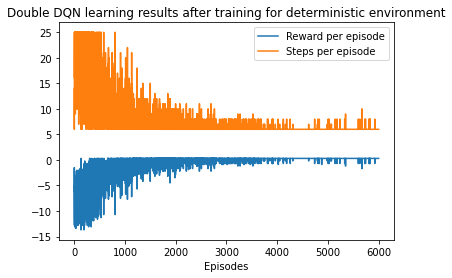

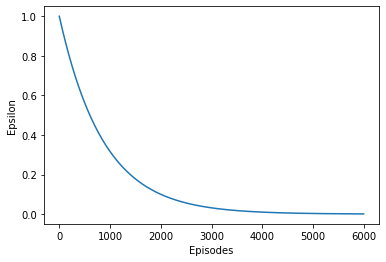

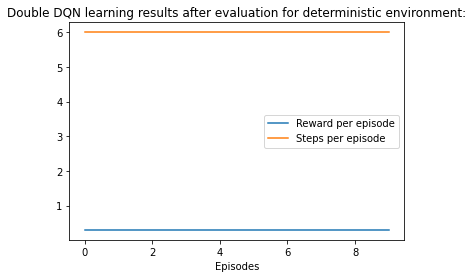

In [10]:
if __name__ == "__main__":
  ddqnLimplemetation()
  